In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 3                               # secs
Samp_rate = 2**10                   # samples per second
N = Samp_rate * T                   # total number of samples  
t = np.linspace(0,T,N)              # T seconds split in N samples
fmax = round(N/2)                   # Maximum frequency in the frequency domain
f_idx = np.arange(0,fmax)/T         # Array with the frequencies in the frequency domain 

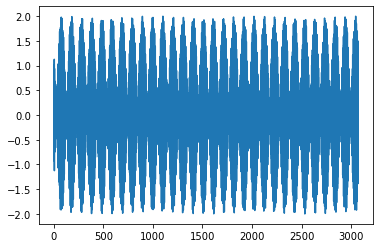

In [3]:
f = np.sin(440*2*np.pi*t)+np.cos(450*2*np.pi*t)
plt.plot(f)

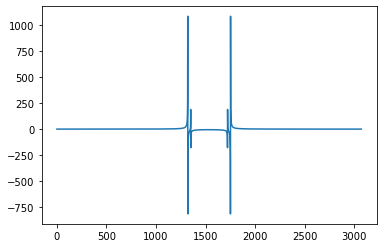

In [4]:
Tf = np.fft.fft(f)
plt.plot(np.real(Tf))

In [5]:
Freqs = abs(Tf[0:round(fmax)])
FFT = pd.DataFrame(Freqs)
FFT['f_idx'] = f_idx
FFT.set_index('f_idx',inplace=True)

<AxesSubplot:xlabel='f_idx'>

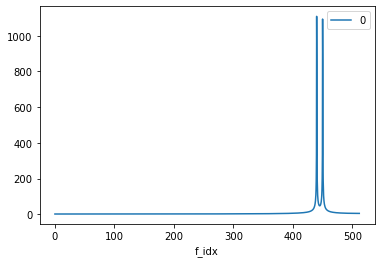

In [6]:
FFT.plot()

In [7]:
FFT.nlargest(10,0)

,0
f_idx,
440.000000,1108.948186
450.000000,1093.707630
450.333333,855.626327
440.333333,838.077179
449.666667,335.328884
439.666667,332.940074
450.666667,306.812021
440.666667,305.531516
449.333333,198.995532


## Reading a real sound
This is an exrtact from "Recording Audio Using Pyauido)

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=132096, comptype='NONE', compname='not compressed')


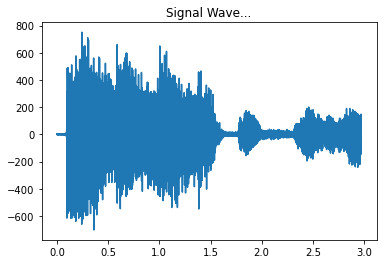

In [7]:
import pyaudio
import wave
import struct
import tkinter

filename = 'output2.wav'

import sys
spf = wave.open(filename, "r")

# Extract Raw Audio from Wav File
signal_f = spf.readframes(-1)
#signal = np.fromstring(signal, "Int16") <- this is the old way to write it. It is being deprecated. 
signal = np.frombuffer(signal_f, np.int16)
signal = signal[:2**int(np.log2(len(signal)))]

fs = spf.getframerate()
print(spf.getparams())

# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)


Time = np.linspace(0, len(signal) / fs, num=len(signal))

plt.figure(1)
plt.title("Signal Wave...")
plt.plot(Time, signal)
plt.show()



In [8]:
len(signal)

131072

In [9]:
spf.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=132096, comptype='NONE', compname='not compressed')

In [10]:
spf.getnframes()/spf.getframerate()

2.995374149659864

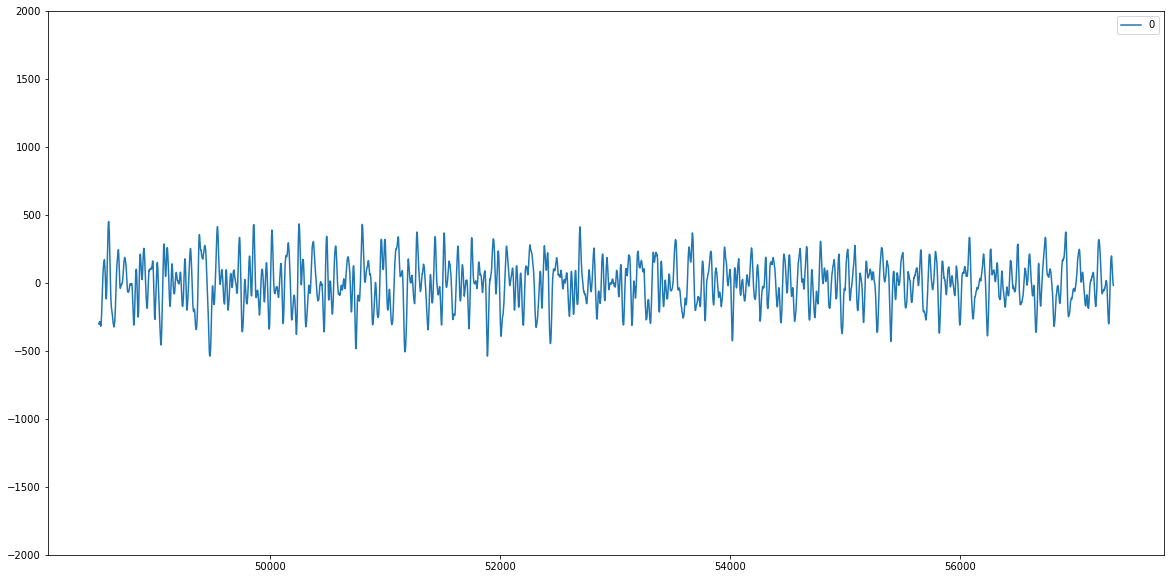

In [11]:
start_frame =int(1.1*fs)
end_frame = int(1.3*fs)

index_series = np.arange(start_frame, end_frame)
my_frames = pd.DataFrame(signal[start_frame:end_frame], index=index_series)

#data_int = pd.DataFrame(struct.unpack('@'+str(chunk)+ 'h',frame)) # 'h' is for 2 byte signed integer
ax = my_frames.plot(figsize=(20,10),ylim=(-2000,2000))


In [12]:
f=my_frames

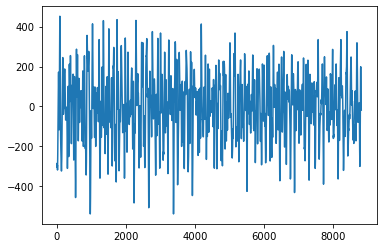

In [13]:
Tf = np.fft.fft(f)
plt.plot(np.real(Tf))

In [14]:
Freqs = abs(Tf[0:round(fmax)])
FFT = pd.DataFrame(Freqs)
FFT['f_idx'] = f_idx
FFT.set_index('f_idx',inplace=True)

<AxesSubplot:xlabel='f_idx'>

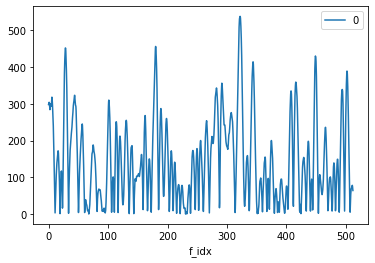

In [15]:
FFT.plot()

In [16]:
FFT.nlargest(10,0)

,0
f_idx,
322.000000,538.0
321.666667,537.0
322.333333,537.0
321.333333,535.0
322.666667,533.0
321.000000,531.0
320.666667,524.0
323.000000,523.0
323.333333,511.0


In [18]:
difs = FFT.iloc[1:len(FFT)].values - FFT.iloc[0:len(FFT)-1].values
difs = np.insert(difs,0,difs.item(0),0)
abs_difs= np.abs(difs)
abs_difs[abs_difs==0]=1
difs =  difs/abs_difs
#difs[np.isnan(difs)]=0
ceros = (difs[1:len(FFT)]-difs[0:len(FFT)-1])
ceros = np.insert(ceros,len(FFT)-1,0,0)


In [19]:
FFT.iloc[ceros<0].nlargest(10,0)

,0
f_idx,
322.000000,538.0
180.000000,456.0
28.333333,452.0
448.666667,430.0
343.666667,414.0
344.000000,414.0
501.666667,389.0
415.666667,359.0
291.333333,356.0


In [20]:
FFT[320:324]

,0
f_idx,
320.000000,487.0
320.333333,509.0
320.666667,524.0
321.000000,531.0
321.333333,535.0
321.666667,537.0
322.000000,538.0
322.333333,537.0
322.666667,533.0


<AxesSubplot:xlabel='f_idx'>

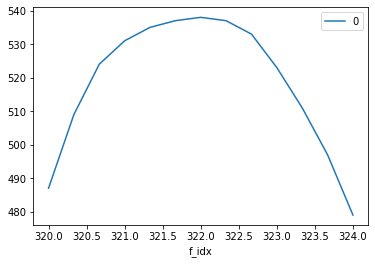

In [21]:
FFT[320:324].plot()

In [22]:
difs[320*3:324*3]

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.]])

In [23]:
ceros[320*3:324*3]

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-2.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])